Current path: /Users/marcomussi/git/HetGaussianProcesses
Heteroskedastic Error Posterior Mean: 0.0 - Posterior Variance: 0.0
Stable Heteroskedastic Error Posterior Mean: 0.0 - Posterior Variance: 0.0


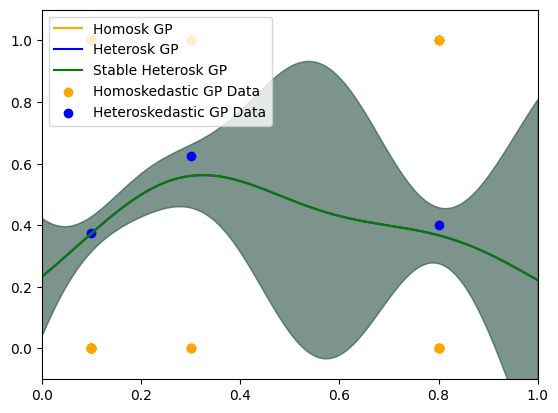

In [1]:
import os, sys, numpy as np
import matplotlib.pyplot as plt

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
print(f"Current path: {os.getcwd()}")
sys.path.append('./')

from supervisedlearning.homoskedastic import GaussianProcessRegressorRBF
from supervisedlearning.heteroskedastic import HeteroskedasticGaussianProcessRegressorRBF

kernel_L = 10
regularization = 1
n_samples_plt = 200
x_plt = np.linspace(0, 1, n_samples_plt)

data_x_aggr = np.array([0.3, 0.8, 0.1]).reshape(-1, 1)
data_y_aggr = np.array([5/8, 4/10, 3/8]).reshape(-1, 1)
n_samples_aggr = np.array([8, 10, 16]).reshape(-1, 1)
data_x = np.vstack((0.3 * np.ones((5, 1)), 0.8 * np.ones((10, 1)), 
                    0.1 * np.ones((16, 1)), 0.3 * np.ones((3, 1))))
data_y = np.vstack((np.ones((3, 1)), np.zeros((2, 1)), np.ones((4, 1)), 
                    np.zeros((6, 1)), np.ones((6, 1)), np.zeros((10, 1)),
                    np.ones((2, 1)), np.zeros((1, 1))))

homRegressor = GaussianProcessRegressorRBF(kernel_L, regularization, input_dim=1)
homRegressor.load_data(data_x, data_y)
y_hat_hom, y_sigma_hom = homRegressor.compute(x_plt.reshape(-1, 1))

hetRegressor = HeteroskedasticGaussianProcessRegressorRBF(
    kernel_L, regularization, input_dim=1, use_stable_model=False)
hetRegressor.load_data(data_x, data_y) 
y_hat_het, y_sigma_het = hetRegressor.compute(x_plt.reshape(-1, 1))

stableHetRegressor = HeteroskedasticGaussianProcessRegressorRBF(
    kernel_L, regularization, input_dim=1, use_stable_model=True)
stableHetRegressor.load_data(data_x, data_y) 
y_hat_stablehet, y_sigma_stablehet = stableHetRegressor.compute(x_plt.reshape(-1, 1))

print(f"Heteroskedastic Error Posterior Mean: {np.round(
    np.sum(np.abs(y_hat_het - y_hat_hom)), 10)} - Posterior Variance: {np.round(
        np.sum(np.abs(y_sigma_het - y_sigma_hom)), 10)}")
print(f"Stable Heteroskedastic Error Posterior Mean: {np.round(
    np.sum(np.abs(y_hat_stablehet - y_hat_hom)), 10)} - Posterior Variance: {np.round(
        np.sum(np.abs(y_sigma_stablehet - y_sigma_hom)), 10)}")

plt.figure()

plt.plot(x_plt, y_hat_hom, color="orange", label=f"Homosk GP")
plt.fill_between(x_plt, y_hat_hom - y_sigma_hom, 
                 y_hat_hom + y_sigma_hom, color="orange", alpha=0.3)

plt.plot(x_plt, y_hat_het, color="blue", label=f"Heterosk GP")
plt.fill_between(x_plt, y_hat_het - y_sigma_het, 
                 y_hat_het + y_sigma_het, color="blue", alpha=0.3)

plt.plot(x_plt, y_hat_stablehet, color="green", label=f"Stable Heterosk GP")
plt.fill_between(x_plt, y_hat_stablehet - y_sigma_stablehet, 
                 y_hat_stablehet + y_sigma_stablehet, color="green", alpha=0.3)

plt.scatter(data_x, data_y, color="orange", label="Homoskedastic GP Data")
plt.scatter(data_x_aggr, data_y_aggr, color="blue", label="Heteroskedastic GP Data")

plt.xlim([0, 1])
plt.ylim([- 0.1, 1.1])
plt.legend()